In [ ]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [ ]:
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import numpy as np
import pathlib
import datetime

print(f"Tensor Flow Version: {tf.__version__}")
print(f"numpy Version: {np.version.version}")

Tensor Flow Version: 2.18.0
numpy Version: 1.26.4


In [ ]:
data_dir = pathlib.Path("../input/emotion-detection-fer/train")
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt" ])
print(CLASS_NAMES)

output_class_units = len(CLASS_NAMES)
print(output_class_units)


0
[]
0


In [ ]:
model = tf.keras.models.Sequential([
    
  tf.keras.layers.Conv2D(96, (11,11),strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2,2)),
    
  tf.keras.layers.Conv2D(256, (11,11),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
     
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Conv2D(384, (3,3),strides=(1,1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
    
  tf.keras.layers.Conv2D(256, (3, 3), strides=(1, 1), activation='relu',padding="same"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.MaxPooling2D(2, strides=(2, 2)),
 
  tf.keras.layers.Flatten(),
  
  tf.keras.layers.Dense(4096, activation='relu'),
    
  tf.keras.layers.Dense(4096, activation='relu'),
    
  tf.keras.layers.Dense(output_class_units, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d ananthu017/emotion-detection-fer


Dataset URL: https://www.kaggle.com/datasets/ananthu017/emotion-detection-fer
License(s): CC0-1.0
 78% 51.0M/65.2M [00:00<00:00, 67.1MB/s]
100% 65.2M/65.2M [00:00<00:00, 75.9MB/s]


In [ ]:
import zipfile


with zipfile.ZipFile("/content/emotion-detection-fer.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")


In [ ]:
import pathlib
import numpy as np
import tensorflow as tf


train_dir = pathlib.Path("/content/dataset/train") 
val_dir = pathlib.Path("/content/dataset/test")    

BATCH_SIZE = 16  
IMG_HEIGHT = 128  
IMG_WIDTH = 128   


image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data_gen = image_generator.flow_from_directory(
    directory=str(train_dir),  
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)  
)


val_data_gen = image_generator.flow_from_directory(
    directory=str(val_dir),  
    batch_size=BATCH_SIZE,
    shuffle=True,
    target_size=(IMG_HEIGHT, IMG_WIDTH)  
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=['accuracy',tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5), tf.keras.metrics.AUC(curve='ROC')])


model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import time
from tensorflow.keras import layers, Sequential


num_classes = len(train_data_gen.class_indices)  
print(f"Number of classes: {num_classes}")


model = Sequential([
    
    layers.Flatten(),  
    layers.Dense(num_classes, activation='softmax')  
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


STEPS_PER_EPOCH = len(train_data_gen)
VALIDATION_STEPS = len(val_data_gen)


start = time.time()
history = model.fit(
    train_data_gen,
    steps_per_epoch=STEPS_PER_EPOCH,
    epochs=10,  
    validation_data=val_data_gen,
    validation_steps=VALIDATION_STEPS
)




Number of classes: 7
Epoch 1/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.2243 - loss: 7.0739 - val_accuracy: 0.2919 - val_loss: 7.8744
Epoch 2/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.2538 - loss: 5.7703 - val_accuracy: 0.2758 - val_loss: 4.6132
Epoch 3/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 45s 23ms/step - accuracy: 0.2574 - loss: 6.0082 - val_accuracy: 0.2126 - val_loss: 8.2212
Epoch 4/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 34s 19ms/step - accuracy: 0.2587 - loss: 6.2410 - val_accuracy: 0.2912 - val_loss: 10.1418
Epoch 5/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - accuracy: 0.2657 - loss: 6.1931 - val_accuracy: 0.2503 - val_loss: 5.5612
Epoch 6/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - accuracy: 0.2668 - loss: 5.5152 - val_accuracy: 0.2519 - val_loss: 6.8978
Epoch 7/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.2728 - loss: 6.1259 - val_accuracy: 0.2882 - val_loss: 4.9950
Epoch 8/10
1795/1795 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/ste

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=AlexNet_saved_model/.

In [ ]:

model.save('AlexNet_saved_model.keras')  



print("Model saved successfully.")


Model saved successfully.


In [ ]:
from tensorflow.keras import layers, Sequential


num_classes = len(train_data_gen.class_indices)
print(f"Number of classes: {num_classes}")


model = Sequential([
    
    layers.Flatten(),  
    layers.Dense(num_classes, activation='softmax')  
])


model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  
    metrics=['accuracy']
)


Number of classes: 2


In [ ]:
print(f"Training Classes: {train_data_gen.class_indices}")
print(f"Validation Classes: {val_data_gen.class_indices}")



Training Classes: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}
Validation Classes: {'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


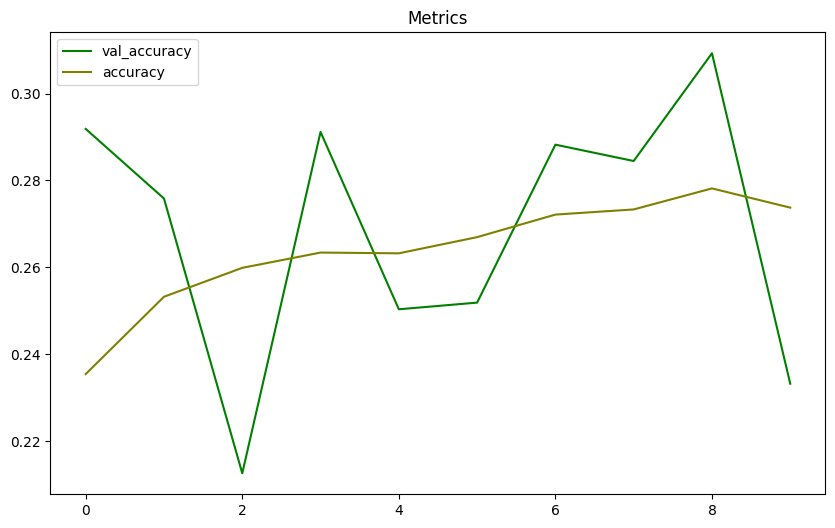

In [ ]:
import matplotlib.pyplot as plt

def plot_hist(history):
    available_metrics = history.history.keys()

    
    metric_colors = {
        "val_sensitivity_at_specificity": 'red',
        "val_auc": 'blue',
        "val_specificity_at_sensitivity": 'orange',
        "val_accuracy": 'green',
        "accuracy": 'olive',
        "precision": 'violet',
        "val_precision": 'purple',
        "recall": 'cyan',
        "val_recall": 'yellow'
    }

    plt.figure(figsize=(10, 6))

    
    for metric, color in metric_colors.items():
        if metric in available_metrics:
            plt.plot(history.history[metric], color=color, label=metric)

    plt.title("Metrics")
    plt.legend(loc='best')
    plt.show()


plot_hist(history)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model("AlexNet_saved_model.keras")  


img_path = "/content/dataset/test/class1/sample_image.jpg"  
img = image.load_img(img_path, target_size=(128, 128))  


img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  


predictions = model.predict(img_array)


class_labels = list(train_data_gen.class_indices.keys())


predicted_class = class_labels[np.argmax(predictions)]
confidence = np.max(predictions)

print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")


In [ ]:
from google.colab import files
import os


uploaded = files.upload()


image_filename = list(uploaded.keys())[0]


image_path = f"/content/{image_filename}"  

print(f"Image uploaded successfully! Saved at: {image_path}")


Saving WhatsApp Image 2024-12-29 at 22.18.58_833a2037.jpg to WhatsApp Image 2024-12-29 at 22.18.58_833a2037.jpg
Image uploaded successfully! Saved at: /content/WhatsApp Image 2024-12-29 at 22.18.58_833a2037.jpg


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image


model = tf.keras.models.load_model("AlexNet_saved_model.keras")  


img_path = f"/content/{image_filename}"  


img = image.load_img(img_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  
img_array /= 255.0  


predictions = model.predict(img_array)


class_labels = list(train_data_gen.class_indices.keys())  


predicted_class = class_labels[np.argmax(predictions)]
confidence = np.max(predictions)

print(f"Predicted Class: {predicted_class} (Confidence: {confidence:.2f})")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted Class: fearful (Confidence: 0.74)
